## Visualize keypoint predictions

1. Load the model 
1. Load an image and it's ground truth keypoints (needs pysolo for that)
1. Convert the image to the correct tensor
1. Run the model on the tensor to get the predicted keypoints
1. Plot the ground truth keypoints on the image in green
1. Plot the predicted keypoints on the image in blue
1. Show the images side-by-side for comparison


### Load the model

In [9]:
from litvgg16 import LitVGG16, TennisCourtImageHelper
from PIL import Image
from IPython.display import Image as DisplayImage
from IPython.display import display
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
model_path = "saved_models/model-epoch=49-train_loss=1.8948.ckpt"
model = LitVGG16.load_from_checkpoint(model_path, num_epochs=-1)

Using cache found in /Users/tleyden/.cache/torch/hub/pytorch_vision_v0.6.0
/opt/miniconda3/envs/tennis_court_cnn/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/miniconda3/envs/tennis_court_cnn/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Load an image and it's ground truth keypoints (needs pysolo for that)

In [26]:
data_path_root = '/Users/tleyden/Library/Application Support/DefaultCompany/TennisCourt/solo_7'
image_path = 'sequence.49/step0.camera.png'
flattened_keypoints = [382.18222, 26.3798828, 607.4084, 28.1077271, 410.833862, 26.59967, 579.454, 27.8931885, 582.07074, 111.802765, 494.122925, 111.096619, 406.8902, 110.396271, 616.579041, 224.423187, 365.377258, 221.744019, 589.249756, 342.009369, 490.556854, 340.917358, 392.7317, 339.225647, 627.539368, 459.0492, 592.8823, 458.493835, 383.9513, 456.281982, 348.4407, 456.170074]
image = Image.open(os.path.join(data_path_root, image_path))

newsize = (224, 224)
image_224_224 = image.resize(newsize)

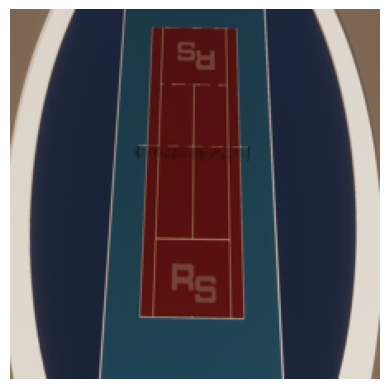

In [27]:
plt.imshow(image_224_224)
plt.axis('off')
plt.show()

### Plot the ground truth keypoints on the image in green

In [17]:
keypoint_pairs = [(int(flattened_keypoints[i]), int(flattened_keypoints[i + 1])) for i in range(0, len(flattened_keypoints), 2)]
keypoint_pairs

[(382, 26),
 (607, 28),
 (410, 26),
 (579, 27),
 (582, 111),
 (494, 111),
 (406, 110),
 (616, 224),
 (365, 221),
 (589, 342),
 (490, 340),
 (392, 339),
 (627, 459),
 (592, 458),
 (383, 456),
 (348, 456)]

In [23]:
cv_image = cv2.imread(os.path.join(data_path_root, image_path))

In [11]:
help(cv2.circle)

Help on built-in function circle:

circle(...)
    circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a circle.
    .   
    .   The function cv::circle draws a simple or filled circle with a given center and radius.
    .   @param img Image where the circle is drawn.
    .   @param center Center of the circle.
    .   @param radius Radius of the circle.
    .   @param color Circle color.
    .   @param thickness Thickness of the circle outline, if positive. Negative values, like #FILLED,
    .   mean that a filled circle is to be drawn.
    .   @param lineType Type of the circle boundary. See #LineTypes
    .   @param shift Number of fractional bits in the coordinates of the center and in the radius value.



In [24]:
# Define the circle parameters
center_coordinates = keypoint_pairs[0]  # (x, y) coordinates of the center
radius = 5  # Radius of the circle
color = (0, 0, 255)  # Red color in BGR format
thickness = 2  # Thickness of the circle's outline

# Draw the circle on the image
image_with_circle = cv2.circle(cv_image, center_coordinates, radius, color, thickness)


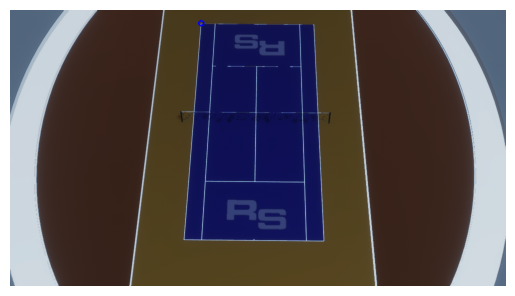

In [25]:
plt.imshow(image_with_circle)
plt.axis('off')
plt.show()